In [1]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix)
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#Loading the dataset
df=pd.read_csv("IMDB Dataset.csv")
print("Size of imdb dataset : ",df.shape[0])
df.head()

Size of imdb dataset :  50000


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


##**Data Preprocessing and Text Normalization** 

In [4]:
#Preprocessing of reviews
blank = []
for i,rv,lb in df.itertuples():
    if rv.isspace():
        blank.append(i)
        
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
    
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#removing special characters
def remove_special_character(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
df['review']=df['review'].apply(strip_html)
df['review']=df['review'].apply(remove_between_square_brackets)
df['review']=df['review'].apply(remove_special_character)
df['review']=df['review'].apply(remove_stopwords)
df['review']=df['review'].apply(simple_stemmer)

print(df.review)

{"you'll", 'ours', "won't", 'itself', 'didn', 'were', 'each', 'i', 'is', 'some', 'above', "wouldn't", 'how', 'had', 'whom', 'himself', "mightn't", 'do', "you're", 'should', 'the', "hasn't", 'such', "don't", 'be', 'hasn', 'needn', 'or', 'are', 'y', 'did', "isn't", "didn't", 'yourself', 'and', 'after', "aren't", 'doing', 'now', 'between', 'for', 'we', 'a', 'about', 'if', 'their', "she's", "you've", 'other', 'over', "doesn't", 'too', 'weren', 'nor', 'me', 'herself', 'isn', 'what', 've', 'themselves', "it's", 'because', 'your', 'until', "wasn't", 'ma', 'o', 'here', 'been', "mustn't", 'll', 'with', 'theirs', 'shouldn', 'on', 'down', 'don', 'these', 'both', 'wasn', 'up', 'hadn', 'during', 'when', 'then', 'as', 'where', 'to', 'those', 'our', 'into', 'his', 'again', "needn't", "weren't", 'yours', 'you', 'will', 's', 'does', 't', 'won', "that'll", 'them', 'aren', 'couldn', 'but', 'haven', 'from', 'my', 'its', 'more', 'hers', 'wouldn', 'an', 'by', 'same', "you'd", 'which', 'can', 'am', 'was', "s

## **Mulitnomial Naive Bayes Classifier**

In [5]:
#TF_IDF_VECTOR_MODEL
print(stop)
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stop)

{"you'll", 'ours', "won't", 'itself', 'didn', 'were', 'each', 'i', 'is', 'some', 'above', "wouldn't", 'how', 'had', 'whom', 'himself', "mightn't", 'do', "you're", 'should', 'the', "hasn't", 'such', "don't", 'be', 'hasn', 'needn', 'or', 'are', 'y', 'did', "isn't", "didn't", 'yourself', 'and', 'after', "aren't", 'doing', 'now', 'between', 'for', 'we', 'a', 'about', 'if', 'their', "she's", "you've", 'other', 'over', "doesn't", 'too', 'weren', 'nor', 'me', 'herself', 'isn', 'what', 've', 'themselves', "it's", 'because', 'your', 'until', "wasn't", 'ma', 'o', 'here', 'been', "mustn't", 'll', 'with', 'theirs', 'shouldn', 'on', 'down', 'don', 'these', 'both', 'wasn', 'up', 'hadn', 'during', 'when', 'then', 'as', 'where', 'to', 'those', 'our', 'into', 'his', 'again', "needn't", "weren't", 'yours', 'you', 'will', 's', 'does', 't', 'won', "that'll", 'them', 'aren', 'couldn', 'but', 'haven', 'from', 'my', 'its', 'more', 'hers', 'wouldn', 'an', 'by', 'same', "you'd", 'which', 'can', 'am', 'was', "s

In [6]:
#Dependent variable
Y=df.sentiment
#Converting df.text from text to features using TF-IDF word embedding model
X=vectorizer.fit_transform(df.review)

In [7]:
#Splitting data into train and test data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

print("Size of training dataset : ",(X_train.shape[0]))
print("Size of testing dataset : ",(X_test.shape[0]))

Size of training dataset :  35000
Size of testing dataset :  15000


In [8]:
#Training dataset based on Multinomial_Naive_Bayes_Classifier model
model=naive_bayes.MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [9]:
#Training score of our training model
model.score(X_train,Y_train)

0.9130571428571429

In [10]:
#Testing our model with some basic examnples
new_review=np.array(["The Matrix Trilogy is a fantastic movie ."])
new_review_vector=vectorizer.transform(new_review)
print(model.predict(new_review_vector))

['positive']


In [11]:
#Testing our model with some basic examples
new_review=np.array(["The Eternals is the worst Marvel movie I have ever seen."])
new_review_vector=vectorizer.transform(new_review)
print(model.predict(new_review_vector))

['negative']


In [12]:
#Predict sentiments of test data using our trained model:
prediction_test = model.predict(X_test)
print(prediction_test)

['positive' 'positive' 'negative' ... 'negative' 'positive' 'positive']


Confusion Matrix:


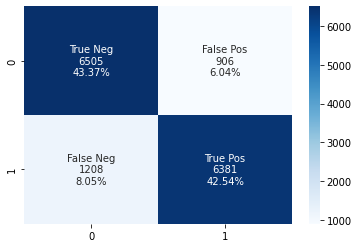

In [13]:
#Confusion matrix
print("Confusion Matrix:")
mat=confusion_matrix(Y_test, prediction_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [14]:
#Parameters for testing the performance of our model:
print("Classification report :")
print(classification_report(Y_test, prediction_test))

Classification report :
              precision    recall  f1-score   support

    negative       0.84      0.88      0.86      7411
    positive       0.88      0.84      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



In [15]:
#Accuracy or Testing score of our model
print(metrics.accuracy_score(Y_test,prediction_test))

0.8590666666666666


## **SVM (Support Vector Machine)**

In [16]:
#Dependent variable :
Y=df.sentiment
#Independent variable
X=df.review

#Split data into train and test data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print("Size of trainining dataset : ",(X_train.shape[0]))
print("Size of testing dataset : ",(X_test.shape[0]))

Size of trainining dataset :  35000
Size of testing dataset :  15000


In [17]:
#Training dataset based on SVM:
model = Pipeline([('tfidf',TfidfVectorizer()),('lsvc',LinearSVC())])
model.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lsvc', LinearSVC())])

In [18]:
#Training score of our model:
model.score(X_train,Y_train)

0.9876857142857143

In [19]:
#Testing our model with some basic examples
new_review=np.array(["Marvel's Eternal is one of the worst movie which I have ever seen."])
new_review_vector=np.reshape(new_review,-1)
print(model.predict(new_review_vector))

['negative']


In [20]:
#Testing our model with some basic examples
new_review=np.array(["Last night I saw a wonderful movie named John Wick."])
new_review_vector=np.reshape(new_review,-1)
print(model.predict(new_review_vector))

['positive']


In [21]:
#Predict sentiments of test data using our trained model:
prediction_test = model.predict(X_test)
print(prediction_test)

['negative' 'positive' 'negative' ... 'negative' 'positive' 'positive']


Confusion Matrix:


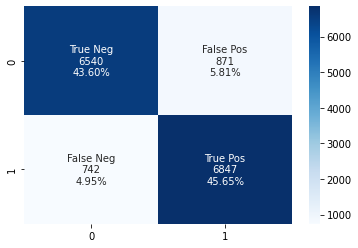

In [22]:
#Confusion matrix
print("Confusion Matrix:")
mat=confusion_matrix(Y_test, prediction_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [23]:
#Parameters for testing the performance of our model:
print("Classification report :")
print(classification_report(Y_test,prediction_test))

Classification report :
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7411
    positive       0.89      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [24]:
#Accuracy or Testing score of our model
print(metrics.accuracy_score(Y_test,prediction_test))

0.8924666666666666


## **Logistic Regression**

In [25]:
#TF_IDF_VECTOR_MODEL
print(stop)
vectorizer=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stop)

{"you'll", 'ours', "won't", 'itself', 'didn', 'were', 'each', 'i', 'is', 'some', 'above', "wouldn't", 'how', 'had', 'whom', 'himself', "mightn't", 'do', "you're", 'should', 'the', "hasn't", 'such', "don't", 'be', 'hasn', 'needn', 'or', 'are', 'y', 'did', "isn't", "didn't", 'yourself', 'and', 'after', "aren't", 'doing', 'now', 'between', 'for', 'we', 'a', 'about', 'if', 'their', "she's", "you've", 'other', 'over', "doesn't", 'too', 'weren', 'nor', 'me', 'herself', 'isn', 'what', 've', 'themselves', "it's", 'because', 'your', 'until', "wasn't", 'ma', 'o', 'here', 'been', "mustn't", 'll', 'with', 'theirs', 'shouldn', 'on', 'down', 'don', 'these', 'both', 'wasn', 'up', 'hadn', 'during', 'when', 'then', 'as', 'where', 'to', 'those', 'our', 'into', 'his', 'again', "needn't", "weren't", 'yours', 'you', 'will', 's', 'does', 't', 'won', "that'll", 'them', 'aren', 'couldn', 'but', 'haven', 'from', 'my', 'its', 'more', 'hers', 'wouldn', 'an', 'by', 'same', "you'd", 'which', 'can', 'am', 'was', "s

In [26]:
#Dependent variable
Y=df.sentiment
#Converting df.text from text to features using TF-IDF word embedding model(feature extraction)
X=vectorizer.fit_transform(df.review)

In [27]:
#Splitting data into train and test data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

print("Size of trainining dataset : ",(X_train.shape[0]))
print("Size of testing dataset : ",(X_test.shape[0]))

Size of trainining dataset :  35000
Size of testing dataset :  15000


In [28]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [29]:
#Training score of our training model
model.score(X_train,Y_train)

0.9298857142857143

In [30]:
#Predict sentiments of test data using our trained model:
prediction_test = model.predict(X_test)
print(prediction_test)

['negative' 'positive' 'negative' ... 'negative' 'positive' 'positive']


Confusion Matrix:


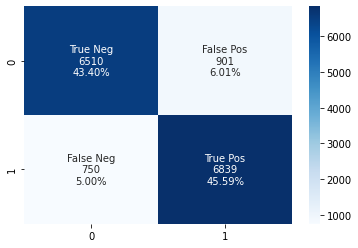

In [31]:
#Confusion matrix
print("Confusion Matrix:")
mat=confusion_matrix(Y_test, prediction_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(mat, annot=labels, fmt='', cmap='Blues')

In [32]:
#Parameters for testing the performance of our model:
print("Classification report :")
print(classification_report(Y_test,prediction_test))

Classification report :
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7411
    positive       0.88      0.90      0.89      7589

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



In [33]:
#Accuracy or Testing score of our model
print(metrics.accuracy_score(Y_test,prediction_test))

0.8899333333333334
